In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Normal Random Variables

In [3]:
from scipy.stats import norm

Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.

### Distribution

The probability density function (pdf) of the normal distribution is

$$f(x, \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [4]:
# Define distribution parameters
mean = 0
std_dev = 1

In [5]:
# Calculate PDF at a specific point
pdf_at_0 = norm.pdf(0, loc=mean, scale=std_dev)
print(f"PDF at 0: {pdf_at_0}")

PDF at 0: 0.3989422804014327


In [6]:
# Calculate CDF at a specific point
cdf_at_1 = norm.cdf(1, loc=mean, scale=std_dev)
print(f"CDF at 1: {cdf_at_1}")

CDF at 1: 0.8413447460685429


In [7]:
# Calculate PPF (inverse of CDF)
ppf_0_95 = norm.ppf(0.95, loc=mean, scale=std_dev)
print(f"PPF at 0.95: {ppf_0_95}")

PPF at 0.95: 1.6448536269514722


### Visualization

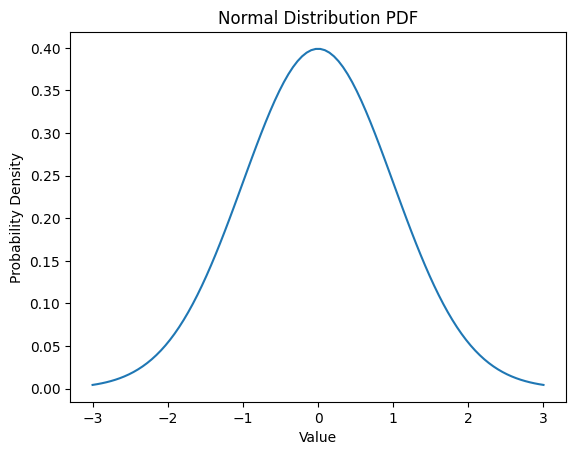

In [8]:
# Plotting the PDF
x = np.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x, loc=mean, scale=std_dev))
plt.title("Normal Distribution PDF")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.show()

In [9]:
# Generate random variates (similar to numpy.random.normal)
random_variates = norm.rvs(loc=mean, scale=std_dev, size=100)
# print(f"Random variates from scipy: {random_variates}")

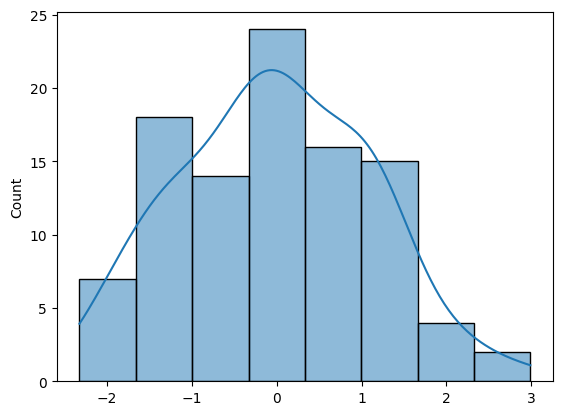

In [10]:
sns.histplot(data=random_variates, kde=True)
plt.show()

## Chi-squared Random Variable

In [4]:
from scipy.stats import chi2
from scipy.special import gamma

A **chi-square random variable** is a non-negative random variable that is the sum of the squares of $k$ independent **standard normal random variables** ($Z\sim\mathcal{N}(0, 1)$), represented as 
$$X^{2}=Z_{1}^{2}+Z_{2}^{2}+\dots +Z_{k}^{2}.$$
It is characterized by a single parameter, the **degrees of freedom** ($df$), which is equal to $k$. 

### Gamma functions

The **gamma function**, denoted as $\Gamma (z)$, is a generalization of the factorial function to real and complex numbers. 

It is defined by the integral 

$$\Gamma (z)=\int_{0}^{\infty}t^{z-1}e^{-t}dt$$

for complex numbers with a positive real part. 

For a positive integer $n$, $\Gamma (n+1)=n!$, and the function satisfies the property $\Gamma (z+1)=z\Gamma (z)$. 

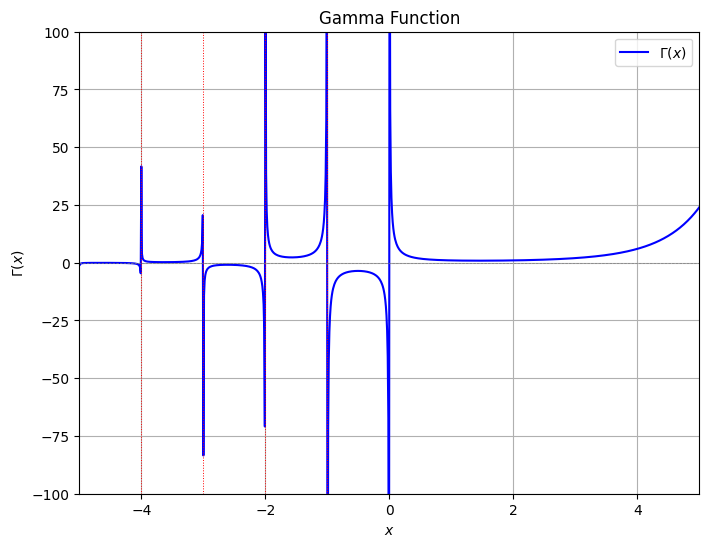

In [5]:
x = np.linspace(-5, 5, 1000)
y = gamma(x)
# Create the plot
plt.figure(figsize=(8, 6)) # Set figure size for better visualization
plt.plot(x, y, label=r'$\Gamma(x)$', color='blue') # Plot the gamma function

# Add a horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
# Add vertical lines at negative integers to highlight discontinuities
for i in range(-4, 0):
    plt.axvline(i, color='red', linestyle=':', linewidth=0.7)
# Set plot limits to focus on the interesting regions
plt.ylim(-100, 100)
plt.xlim(-5, 5)

# Add labels and title
plt.xlabel('$x$')
plt.ylabel(r'$\Gamma(x)$')
plt.title('Gamma Function')
plt.legend()
plt.grid(True) # Add a grid for better readability

# Display the plot
plt.show()

### Distribution of the Chi-squared variable

The probability density function (pdf) of the chi-squared distribution is
$$f(x, k) = \left\{\begin{matrix}
\frac{x^{k/2-1}e^{-x/2}}{2^{k/2}\Gamma \big(\frac{k}{2}\big)}, & x > 0 \\
 0, &  \text{otherwise}\\
\end{matrix}\right.$$

In [ ]:
df = 7
# Calculate PDF at specific values
x_values = np.arange(0, 20, 0.1)
pdf_values = chi2.pdf(x_values, df=df)

In [4]:
# Calculate CDF at a specific value
cdf_at_6 = chi2.cdf(6, df=df)
print(f"CDF at x=6: {cdf_at_6}")

CDF at x=6: 0.4602506496044429


In [5]:
# Calculate PPF (quantile function)
# This finds the value x for which the CDF is equal to a given probability
ppf_value = chi2.ppf(0.95, df=df)
print(f"95th percentile: {ppf_value}")

95th percentile: 14.067140449340169


In [6]:
# Generate random deviates using scipy.stats
random_deviates = chi2.rvs(df=df, size=1000)

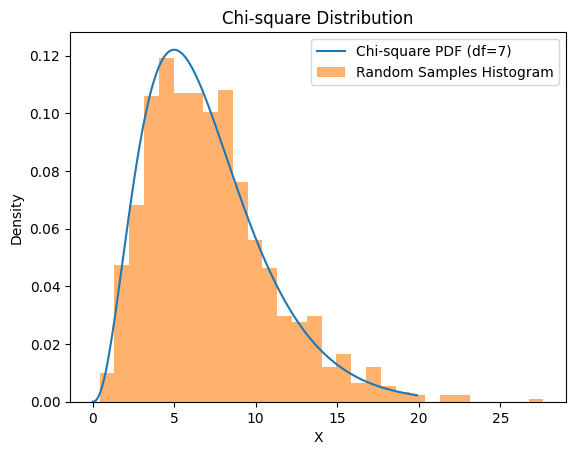

In [7]:
# Plotting the PDF and a histogram of generated samples
plt.plot(x_values, pdf_values, label=f'Chi-square PDF (df={df})')
plt.hist(random_deviates, bins=30, density=True, alpha=0.6, label='Random Samples Histogram')
plt.title('Chi-square Distribution')
plt.xlabel('X')
plt.ylabel('Density')
plt.legend()
plt.show()

## Student t Random Variable 

In [6]:
from scipy.stats import t

If $Z\sim\mathcal{N}(0, 1)$ and $X\sim\chi^2(t)$ are independent, then the random variable:

$$T = \frac{Z}{\sqrt{X/k}}$$

follows a $t$-distribution with $k$ degrees of freedom. 

### Generate Samples

In [ ]:
# Define degrees of freedom
df = 10 # For a sample size of n (n-1)

In [12]:
# Generate random samples from the t-distribution
samples = t.rvs(df, size=1000)

### Distribution

The probability density function (pdf) of the t-distribution is
$$f(x, k) = \frac{\Gamma\big(\frac{k+1}{2}\big)}{\sqrt{\pi k}\Gamma\big(\frac{k}{2}\big)}\cdot\frac{1}{\big(1 + 
\frac{x^2}{k}\big)^{\frac{k+1}{2}}}$$

In [8]:
# Calculate PDF at a specific value
x_val = 1.5
pdf_value = t.pdf(x_val, df)
print(f"PDF at x={x_val}: {pdf_value}")

PDF at x=1.5: 0.12001717451358736


In [9]:
# Calculate CDF at a specific value
cdf_value = t.cdf(x_val, df)
print(f"CDF at x={x_val}: {cdf_value}")

CDF at x=1.5: 0.8847080673775886


In [18]:
quantile = 0.95
ppf_value = t.ppf(quantile, df)
print(f"PPF at {quantile}: {ppf_value:.4f}")

PPF at 0.95: 1.7033


In [19]:
# Calculate a 95% confidence interval
confidence_interval = t.interval(0.95, df)
print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (np.float64(-2.0518305164802833), np.float64(2.0518305164802833))


In [20]:
# Find the critical t-value for a 95% confidence interval (two-tailed)
# This means alpha/2 = 0.025 in each tail, so we look for 0.975
critical_t_value = t.ppf(0.975, df)
# Calculates the Percent Point Function (PPF), also known as the quantile function or inverse CDF. 
# This gives the value x for a given cumulative probability q.
print(f"Critical t-value for 95% CI: {critical_t_value}")

Critical t-value for 95% CI: 2.0518305164802833


### Visualization

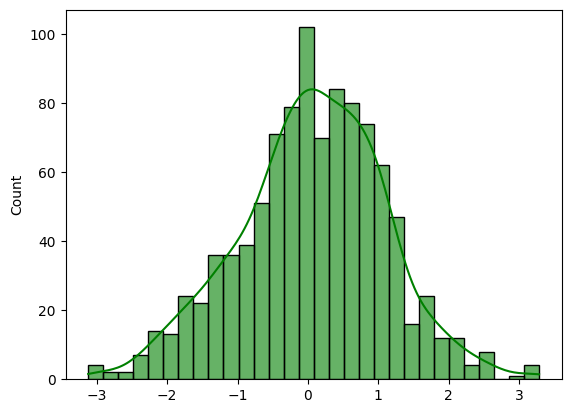

In [22]:
# Plot the histogram of the samples
sns.histplot(samples, bins=30, alpha=0.6, color='g', label='Random Samples', kde=True)
plt.show()

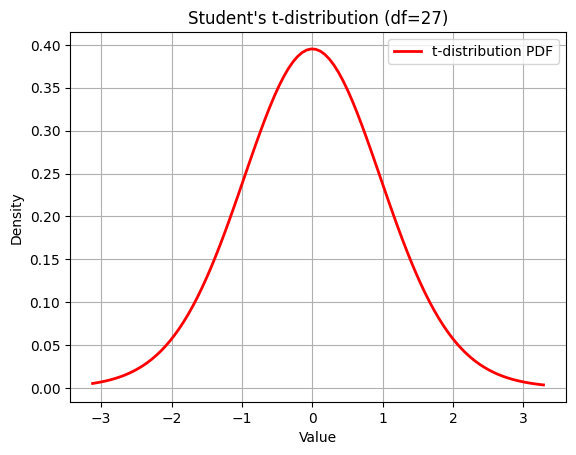

In [14]:
# Plot the PDF of the t-distribution
x = np.linspace(min(samples), max(samples), 100)
plt.plot(x, t.pdf(x, df), 'r-', lw=2, label='t-distribution PDF')

plt.title(f'Student\'s t-distribution (df={df})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

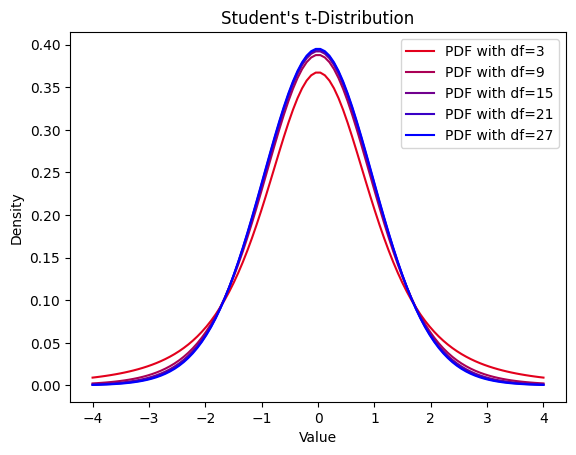

In [11]:
tvalues = np.linspace(-4, 4, 100)
dfs = np.arange(start=3, stop=30, step=6)

for df in dfs:
    plt.plot(tvalues, t.pdf(tvalues, df),  color=(1 - df/np.max(dfs), 0, df/np.max(dfs)), label=f"PDF with df={df}")
    # plt.plot(tvalues, t.pdf(tvalues, 7), color='green', label='PDF')
plt.title("Student's t-Distribution")
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## References

* [Equation Editor for online mathematics](https://editor.codecogs.com/)
* [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution)
* [26.4 - Student's t Distribution](https://online.stat.psu.edu/stat414/lesson/26/26.4)